In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/timesworlduniversityrankings2024/TIMES_WorldUniversityRankings_2024.csv


# TIMES - World Univesity Ranking 2024

# Exploratory Data Analysis

## Goal

1. Explore the distribution of Top Rank World University across Country, Research, Citation, Teaching, Number of Students, International Look, and Member Type

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set_palette("Spectral")

import warnings
warnings.filterwarnings("ignore")

In [3]:
wur = pd.read_csv("/kaggle/input/timesworlduniversityrankings2024/TIMES_WorldUniversityRankings_2024.csv")

In [4]:
wur.columns

Index(['rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'disabled',
       'website_url'],
      dtype='object')

In [5]:
wur.head()

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,record_type,member_level,url,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,disabled,website_url
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,98.7,77,97.5,14,master_account,0,/world-university-rankings/university-oxford,468,United Kingdom,"21,750",10.9,42%,49 : 51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,False,https://www.timeshighereducation.com/student/r...
1,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,2,100.0,25,87.0,167,private,0,/world-university-rankings/stanford-university,467,United States,"14,517",6.4,23%,47 : 53,Stanford University,"Computer Science,Communication & Media Studies...",False,False,False,NaN
2,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,100.0,16,93.8,66,private,0,/world-university-rankings/massachusetts-insti...,471,United States,"11,085",8.0,33%,41 : 59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,False,False,https://www.timeshighereducation.com/student/r...
3,4,Harvard University,97.8,40,97.7,3,99.9,3,99.4,3,84.2,216,90.8,119,private,0,/world-university-rankings/harvard-university,466,United States,"20,050",9.0,25%,51 : 49,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,False,https://www.timeshighereducation.com/student/r...
4,5,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,12,87.9,180,97.4,15,master_account,0,/world-university-rankings/university-cambridge,470,United Kingdom,"20,565",11.5,38%,48 : 52,University of Cambridge,Politics & International Studies (incl Develop...,False,False,False,https://www.timeshighereducation.com/student/r...


## Data Quality

### Data Types Check

In [6]:
wur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank                               2673 non-null   object 
 1   name                               2673 non-null   object 
 2   scores_overall                     1904 non-null   object 
 3   scores_overall_rank                2673 non-null   int64  
 4   scores_teaching                    1904 non-null   float64
 5   scores_teaching_rank               2673 non-null   int64  
 6   scores_research                    1904 non-null   float64
 7   scores_research_rank               2673 non-null   int64  
 8   scores_citations                   1904 non-null   float64
 9   scores_citations_rank              2673 non-null   int64  
 10  scores_industry_income             1904 non-null   float64
 11  scores_industry_income_rank        2673 non-null   int64

need to change type = rank, scores_overall, stats_number_students, stats_pc_intl_students

In [7]:
wur["rank"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '=30', '32', '33', '34', '35',
       '36', '37', '=38', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '=55', '57', '58', '59',
       '60', '61', '62', '63', '=64', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83',
       '84', '85', '86', '=87', '90', '91', '=92', '94', '=95', '=97',
       '=99', '101', '102', '=103', '105', '=106', '=109', '=111', '114',
       '115', '=116', '118', '=119', '121', '122', '=123', '125', '126',
       '127', '128', '129', '=130', '132', '133', '134', '135', '=136',
       '=138', '=140', '=143', '=145', '147', '148', '149', '=150',
       '=152', '=155', '=158', '160', '=161', '=164', '166', '167',
       '=168', '174', '=175', '=177', '180', '181', '182', '18

In [8]:
wur.scores_overall.unique()

array(['98.5', '98.0', '97.9', '97.8', '97.5', '96.9', '96.5', '95.1',
       '94.6', '94.2', '93.1', '92.4', '92.1', '91.8', '91.1', '91.0',
       '90.9', '90.1', '90.0', '89.5', '88.6', '88.1', '87.4', '86.3',
       '85.3', '83.9', '83.5', '83.2', '83.1', '82.5', '82.3', '81.4',
       '81.0', '80.3', '80.0', '79.2', '79.0', '78.5', '78.0', '77.9',
       '77.7', '77.5', '77.0', '76.8', '76.7', '76.3', '76.0', '75.9',
       '75.6', '75.5', '75.4', '75.2', '75.0', '74.8', '74.4', '74.1',
       '73.8', '73.6', '73.4', '73.3', '73.0', '72.6', '72.3', '72.1',
       '72.0', '71.3', '71.2', '70.9', '70.8', '70.5', '70.4', '70.2',
       '70.1', '70.0', '69.9', '69.8', '69.3', '69.2', '68.9', '68.7',
       '68.5', '68.2', '68.0', '67.8', '67.4', '67.2', '67.0', '66.9',
       '66.7', '66.6', '66.5', '66.3', '66.2', '66.1', '65.9', '65.8',
       '65.7', '65.6', '65.4', '65.3', '65.2', '65.1', '65.0', '64.9',
       '64.7', '64.6', '64.3', '64.1', '63.9', '63.8', '63.7', '63.6',
      

In [9]:
wur.scores_overall = wur.scores_overall.str.replace("55.9–58.6", "")
wur.scores_overall = wur.scores_overall.str.replace("53.1–55.8", "")
wur.scores_overall = wur.scores_overall.str.replace("51.1–53.0", "")
wur.scores_overall = wur.scores_overall.str.replace("49.1–51.0", "")
wur.scores_overall = wur.scores_overall.str.replace("45.4–49.0", "")
wur.scores_overall = wur.scores_overall.str.replace("41.9–45.3", "")
wur.scores_overall = wur.scores_overall.str.replace("37.0–41.8", "")
wur.scores_overall = wur.scores_overall.str.replace("32.7–36.9", "")
wur.scores_overall = wur.scores_overall.str.replace("28.3–32.6", "")
wur.scores_overall = wur.scores_overall.str.replace("22.8–28.2", "")
wur.scores_overall = wur.scores_overall.str.replace("9.7–22.7", "")
wur.scores_overall = wur.scores_overall.str.replace("nan", "")

In [10]:
wur.scores_overall = pd.to_numeric(wur.scores_overall)

In [11]:
wur.stats_number_students.unique()

array(['21,750', '14,517', '11,085', ..., '4,872', '4,454', '31,103'],
      dtype=object)

In [12]:
wur.stats_number_students = wur.stats_number_students.str.replace(",", "")

In [13]:
wur.stats_number_students=pd.to_numeric(wur.stats_number_students)

In [14]:
wur.stats_pc_intl_students.unique()

array(['42%', '23%', '33%', '25%', '38%', '61%', '22%', '21%', '43%',
       '10%', '36%', '14%', '28%', '35%', '15%', '24%', '27%', '16%',
       '44%', '18%', '46%', '39%', '64%', '19%', '29%', '47%', '53%',
       '34%', '9%', '72%', '20%', '30%', '45%', '8%', '11%', '5%', '51%',
       '13%', '48%', '17%', '31%', '67%', '40%', '26%', '37%', '32%',
       '12%', '6%', '57%', '7%', '4%', '41%', '60%', '1%', '49%', '2%',
       '3%', '92%', '55%', '83%', '0%', '50%', '54%', '74%', '75%', '86%',
       '52%', '82%', '59%', '97%', '63%', '73%', '%', '90%', '96%', '69%',
       '70%', '-0%', '56%', '91%', '88%', '100%', '80%', '58%', '85%'],
      dtype=object)

In [15]:
wur.stats_pc_intl_students

0       42%
1       23%
2       33%
3       25%
4       38%
       ... 
2668    35%
2669     0%
2670     1%
2671     0%
2672     0%
Name: stats_pc_intl_students, Length: 2673, dtype: object

In [16]:
wur.stats_pc_intl_students = wur.stats_pc_intl_students.str.replace("%", "")
wur.stats_pc_intl_students = pd.to_numeric(wur.stats_pc_intl_students)

In [17]:
wur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank                               2673 non-null   object 
 1   name                               2673 non-null   object 
 2   scores_overall                     201 non-null    float64
 3   scores_overall_rank                2673 non-null   int64  
 4   scores_teaching                    1904 non-null   float64
 5   scores_teaching_rank               2673 non-null   int64  
 6   scores_research                    1904 non-null   float64
 7   scores_research_rank               2673 non-null   int64  
 8   scores_citations                   1904 non-null   float64
 9   scores_citations_rank              2673 non-null   int64  
 10  scores_industry_income             1904 non-null   float64
 11  scores_industry_income_rank        2673 non-null   int64

### missing value, duplicate and outlier check

In [18]:
wur.isnull().sum()

rank                                    0
name                                    0
scores_overall                       2472
scores_overall_rank                     0
scores_teaching                       769
scores_teaching_rank                    0
scores_research                       769
scores_research_rank                    0
scores_citations                      769
scores_citations_rank                   0
scores_industry_income                769
scores_industry_income_rank             0
scores_international_outlook          769
scores_international_outlook_rank       0
record_type                             0
member_level                            0
url                                     0
nid                                     0
location                                0
stats_number_students                   0
stats_student_staff_ratio               0
stats_pc_intl_students                  3
stats_female_male_ratio                93
aliases                           

need to fill : scores_overall,scores_teaching, scores_research
scores_citations, scores_industry_income,scores_international_outlook,stats_pc_intl_students,stats_female_male_ratio, subjects_offered, website_url

<Axes: xlabel='scores_overall'>

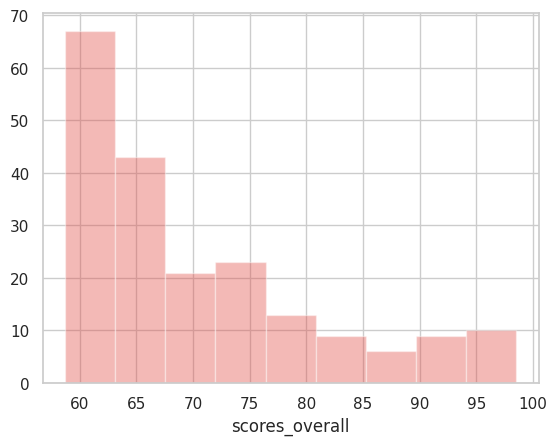

In [19]:
sns.distplot(wur["scores_overall"], kde=False, hist=True)

In [20]:
wur["scores_overall"]=wur["scores_overall"].fillna(wur["scores_overall"].mean())

<Axes: xlabel='scores_teaching'>

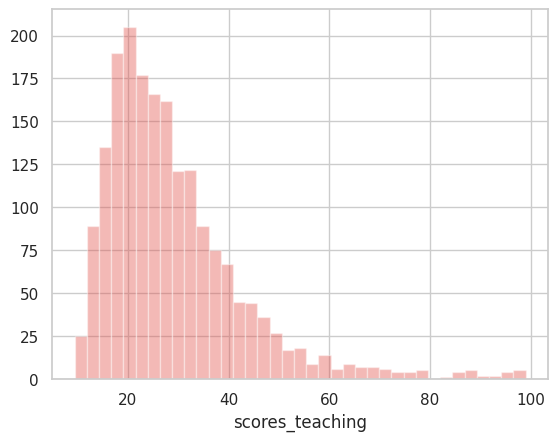

In [21]:
sns.distplot(wur["scores_teaching"], kde=False, hist=True)

In [22]:
wur["scores_teaching"]=wur["scores_teaching"].fillna(wur["scores_teaching"].mean())

<Axes: xlabel='scores_research'>

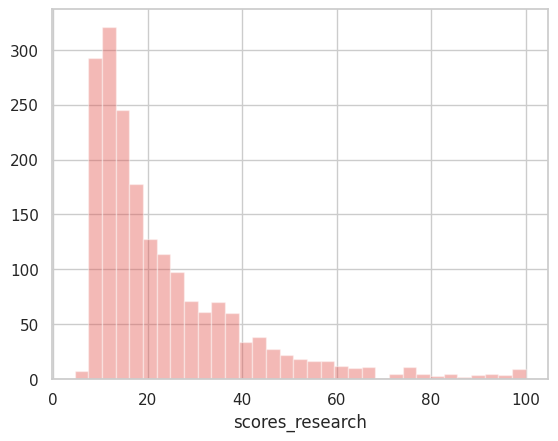

In [23]:
sns.distplot(wur["scores_research"], kde=False, hist=True)

In [24]:
wur["scores_research"]=wur["scores_research"].fillna(wur["scores_research"].mean())

<Axes: xlabel='scores_citations'>

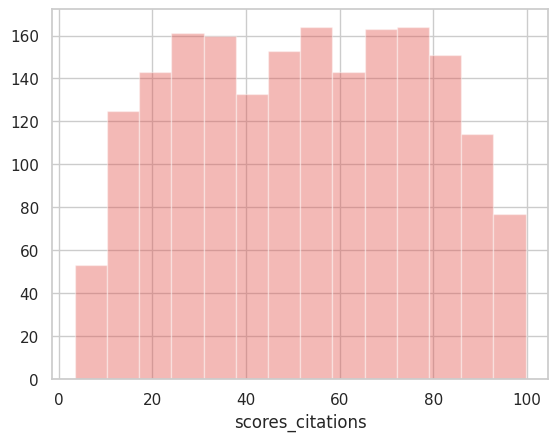

In [25]:
sns.distplot(wur["scores_citations"], kde=False, hist=True)

In [26]:
wur["scores_citations"]=wur["scores_citations"].fillna(wur["scores_citations"].mean())

<Axes: xlabel='scores_industry_income'>

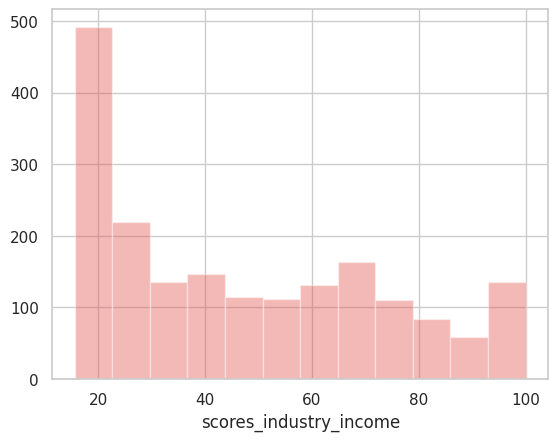

In [27]:
sns.distplot(wur["scores_industry_income"], kde=False, hist=True)


In [28]:
wur["scores_industry_income"]=wur["scores_industry_income"].fillna(wur["scores_industry_income"].mean())

<Axes: xlabel='scores_international_outlook', ylabel='Density'>

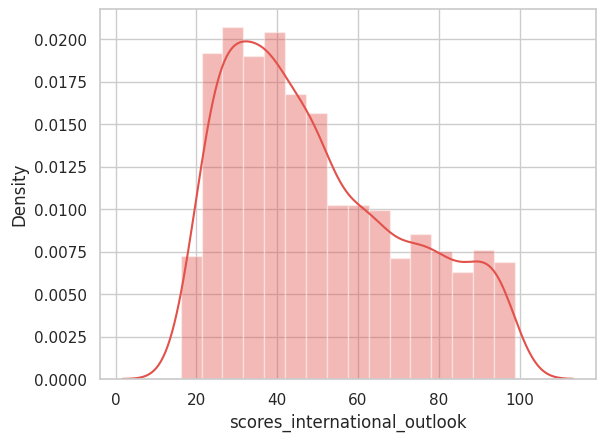

In [29]:
sns.distplot(wur["scores_international_outlook"], kde=True, hist=True)

In [30]:
wur["scores_international_outlook"]=wur["scores_international_outlook"].fillna(wur["scores_international_outlook"].mean())

<Axes: xlabel='stats_pc_intl_students', ylabel='Density'>

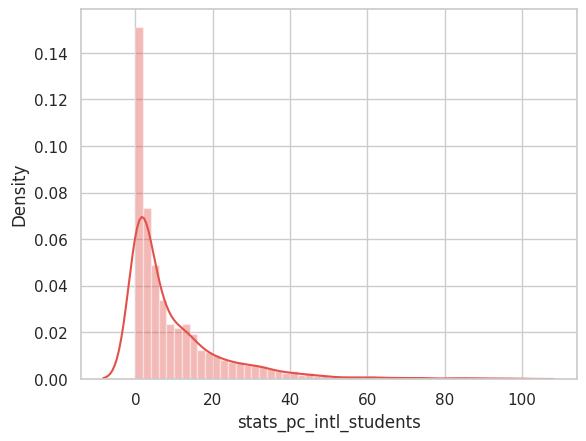

In [31]:
sns.distplot(wur["stats_pc_intl_students"], kde=True, hist=True)

In [32]:
wur["stats_pc_intl_students"]=wur["stats_pc_intl_students"].fillna(wur["stats_pc_intl_students"].mean())

In [33]:
wur["stats_female_male_ratio"].mode()

0    55 : 45
Name: stats_female_male_ratio, dtype: object

In [34]:
wur["stats_female_male_ratio"]=wur["stats_female_male_ratio"].fillna(wur["stats_female_male_ratio"].mode())

In [35]:
wur["subjects_offered"].mode()

0    Medicine & Dentistry,Other Health
Name: subjects_offered, dtype: object

In [36]:
wur["subjects_offered"]=wur["subjects_offered"].fillna(wur["subjects_offered"].mode())


In [37]:
del wur["website_url"]

In [38]:
wur.isnull().sum()

rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
record_type                           0
member_level                          0
url                                   0
nid                                   0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              93
aliases                               0
subjects_offered                      4


In [39]:
wur.shape

(2673, 28)

In [40]:
wur.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2668    False
2669    False
2670    False
2671    False
2672    False
Length: 2673, dtype: bool

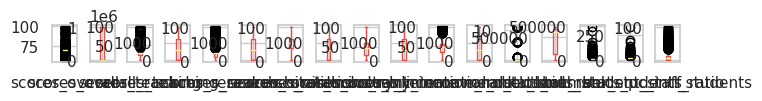

In [41]:
wur_num_plot = wur.select_dtypes(include= ["int","float"])

wur_num_plot.plot(subplots=True, layout=(25,25), kind="box", figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

## Data Insight

### Goal

1. Explore the distribution of Top Rank World University across Country, Record Type, Research score, Citation score, Teaching score, Number of Students, and International Look

In [42]:
wur.head()

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,record_type,member_level,url,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,disabled
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,98.7,77,97.5,14,master_account,0,/world-university-rankings/university-oxford,468,United Kingdom,21750,10.9,42.0,49 : 51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,False
1,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,2,100.0,25,87.0,167,private,0,/world-university-rankings/stanford-university,467,United States,14517,6.4,23.0,47 : 53,Stanford University,"Computer Science,Communication & Media Studies...",False,False,False
2,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,100.0,16,93.8,66,private,0,/world-university-rankings/massachusetts-insti...,471,United States,11085,8.0,33.0,41 : 59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,False,False
3,4,Harvard University,97.8,40,97.7,3,99.9,3,99.4,3,84.2,216,90.8,119,private,0,/world-university-rankings/harvard-university,466,United States,20050,9.0,25.0,51 : 49,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,False
4,5,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,12,87.9,180,97.4,15,master_account,0,/world-university-rankings/university-cambridge,470,United Kingdom,20565,11.5,38.0,48 : 52,University of Cambridge,Politics & International Studies (incl Develop...,False,False,False


### 1.1 The distribution of Top 10 Country which have largest number of University 

Text(0, 0.5, 'Amount of University')

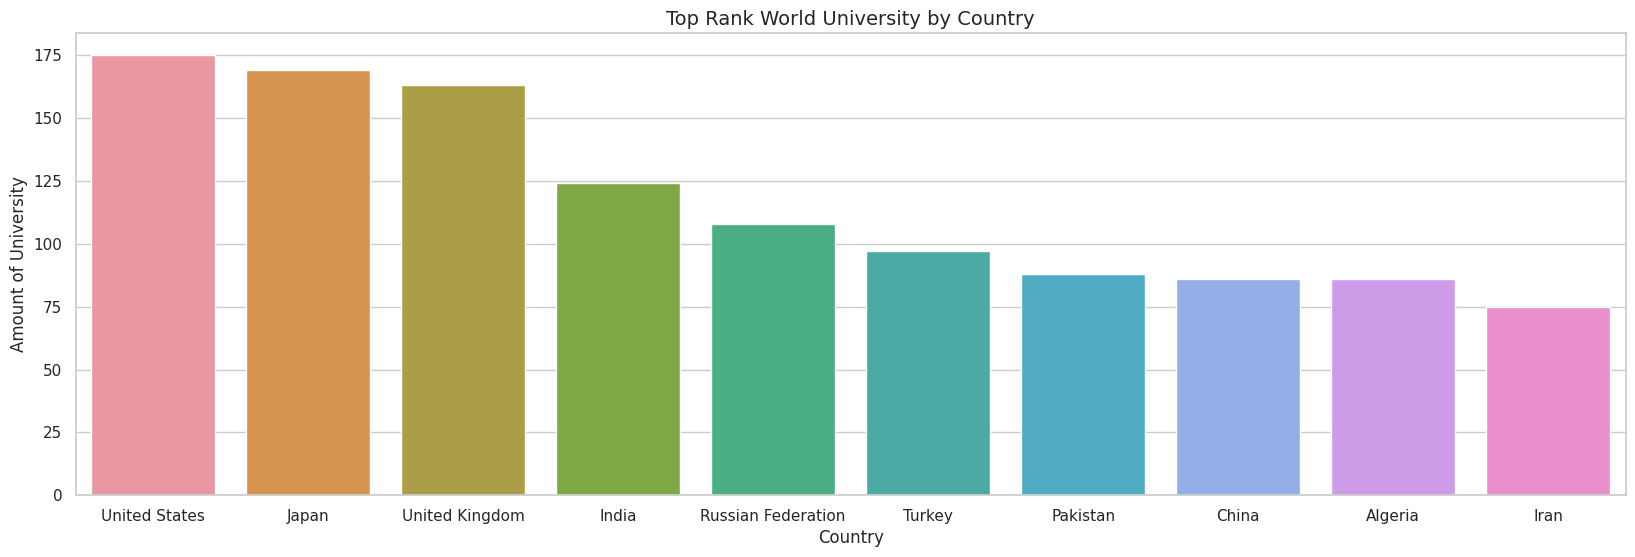

In [43]:
top_country= wur["location"].value_counts().head(10)

plt.figure(figsize=(20,6))
sns.barplot(x=top_country.index, y=top_country)
plt.title("Top Rank World University by Country", fontsize=14) 
plt.xlabel("Country", fontsize=12) 
plt.ylabel("Amount of University", fontsize=12)

#### So, United States be country with the largest amount of universities in World Univesity Rank 2024

### 1.2 The distribution of Top 10 Record_type of World University Rangking

Text(0, 0.5, 'Amount of University')

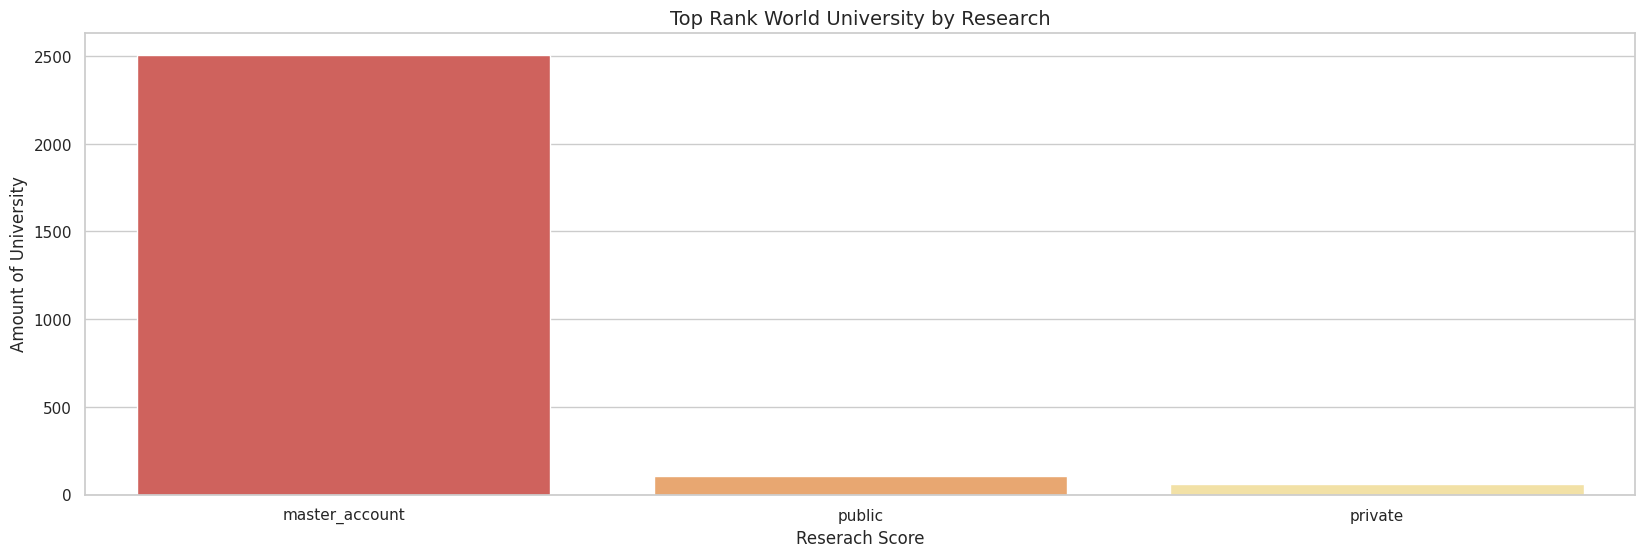

In [44]:
top_member= wur["record_type"].value_counts().head(10)

plt.figure(figsize=(20,6))
sns.barplot(x=top_member.index, y=top_member)
plt.title("Top Rank World University by Research", fontsize=14) 
plt.xlabel("Reserach Score", fontsize=12) 
plt.ylabel("Amount of University", fontsize=12)

#### So, Most of Universities in World University Ranking 2024 are Master_Acount University

### 1.3 The distribution of Asean Countries in World University Ranking

In [45]:
wur["location"].unique()

array(['United Kingdom', 'United States', 'Switzerland', 'China',
       'Singapore', 'Canada', 'Japan', 'Germany', 'Hong Kong',
       'Australia', 'France', 'Belgium', 'Netherlands', 'Sweden',
       'South Korea', 'Russian Federation', 'Denmark', 'Austria',
       'Finland', 'Norway', 'Ireland', 'New Zealand', 'Spain', 'Taiwan',
       'Italy', 'South Africa', 'Macao', 'United Arab Emirates', 'India',
       'Saudi Arabia', 'Luxembourg', 'Brazil', 'Israel', 'Malaysia',
       'Qatar', 'Hungary', 'Iran', 'Estonia', 'Turkey',
       'Brunei Darussalam', 'Czech Republic', 'Portugal', 'Chile',
       'Pakistan', 'Ukraine', 'Lebanon', 'Greece', 'Cyprus', 'Iceland',
       'Kazakhstan', 'Ghana', 'Thailand', 'Vietnam', 'Northern Cyprus',
       'Egypt', 'Poland', 'Jordan', 'Mexico', 'Oman', 'Colombia',
       'Serbia', 'Bangladesh', 'Romania', 'Nigeria', 'Indonesia',
       'Lithuania', 'Slovenia', 'Uganda', 'Malta', 'Iraq', 'Tunisia',
       'Palestine', 'Philippines', 'Sri Lanka', 'Slova

Text(0, 0.5, 'Amount of University')

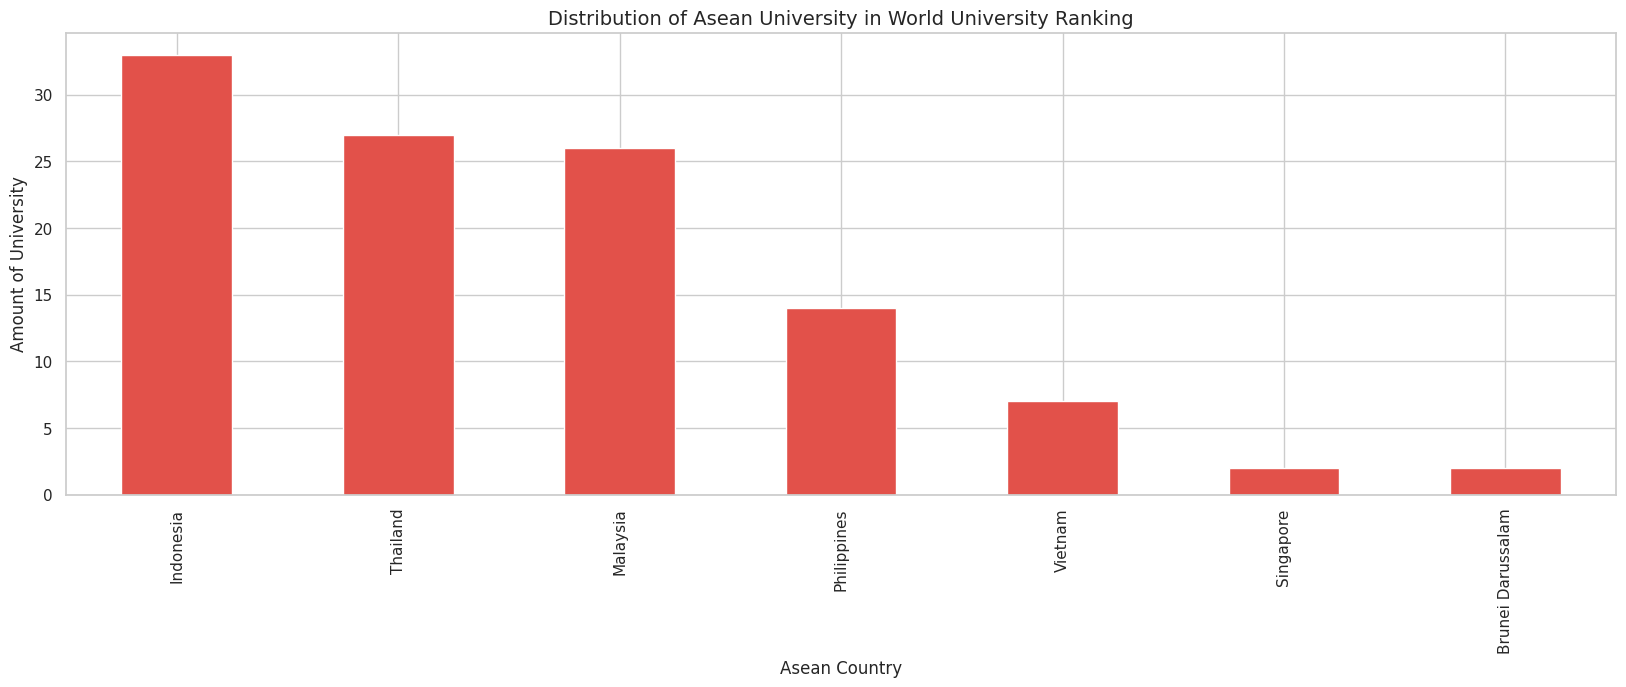

In [46]:
asean = ["Indonesia", "Malaysia", "Thailand", "Brunei Darussalam", "Philippines", "Singapore", "Vietnam"]
top_asean= wur[wur["location"].isin(asean)]
sum_asean= top_asean["location"].value_counts()

plt.figure(figsize=(20,6))
sum_asean.plot(kind="bar")
plt.title("Distribution of Asean University in World University Ranking", fontsize=14) 
plt.xlabel("Asean Country", fontsize=12) 
plt.ylabel("Amount of University", fontsize=12)

#### look for universities in Indonesia that present in TIMES WOrld University Ranking 2024

In [47]:
univ_ind = wur[wur["location"]=="Indonesia"]

list_univ_ind = univ_ind["name"].tolist()
for universitas in list_univ_ind:
    print(universitas)

University of Indonesia
Universitas Airlangga
Bandung Institute of Technology (ITB)
BINUS University
Universitas Gadjah Mada
IPB University
Universitas Sebelas Maret
Universitas Syiah Kuala
Institut Teknologi Sepuluh Nopember
Universitas Andalas
University of Brawijaya
Diponegoro University
Hasanuddin University
Islamic University of Indonesia
Jember University
University of Lampung
Universitas Negeri Surabaya
Universitas Padjadjaran
Universitas Pendidikan Indonesia
Universitas Sriwijaya
State University of Malang
Universitas Sumatera Utara
Telkom University
Yogyakarta State University
Universitas Ahmad Dahlan
Bakrie University
Universitas Islam Sultan Agung
University of Mataram
Universitas Mercu Buana
Universitas Muhammadiyah Yogyakarta
Satya Wacana Christian University
Institut Teknologi Nasional Bandung (ITENAS Bandung)
UIN Sulthan Thaha Saifuddin Jambi


### 1.4 Distribution of world university rank across research

Text(0, 0.5, 'Rank')

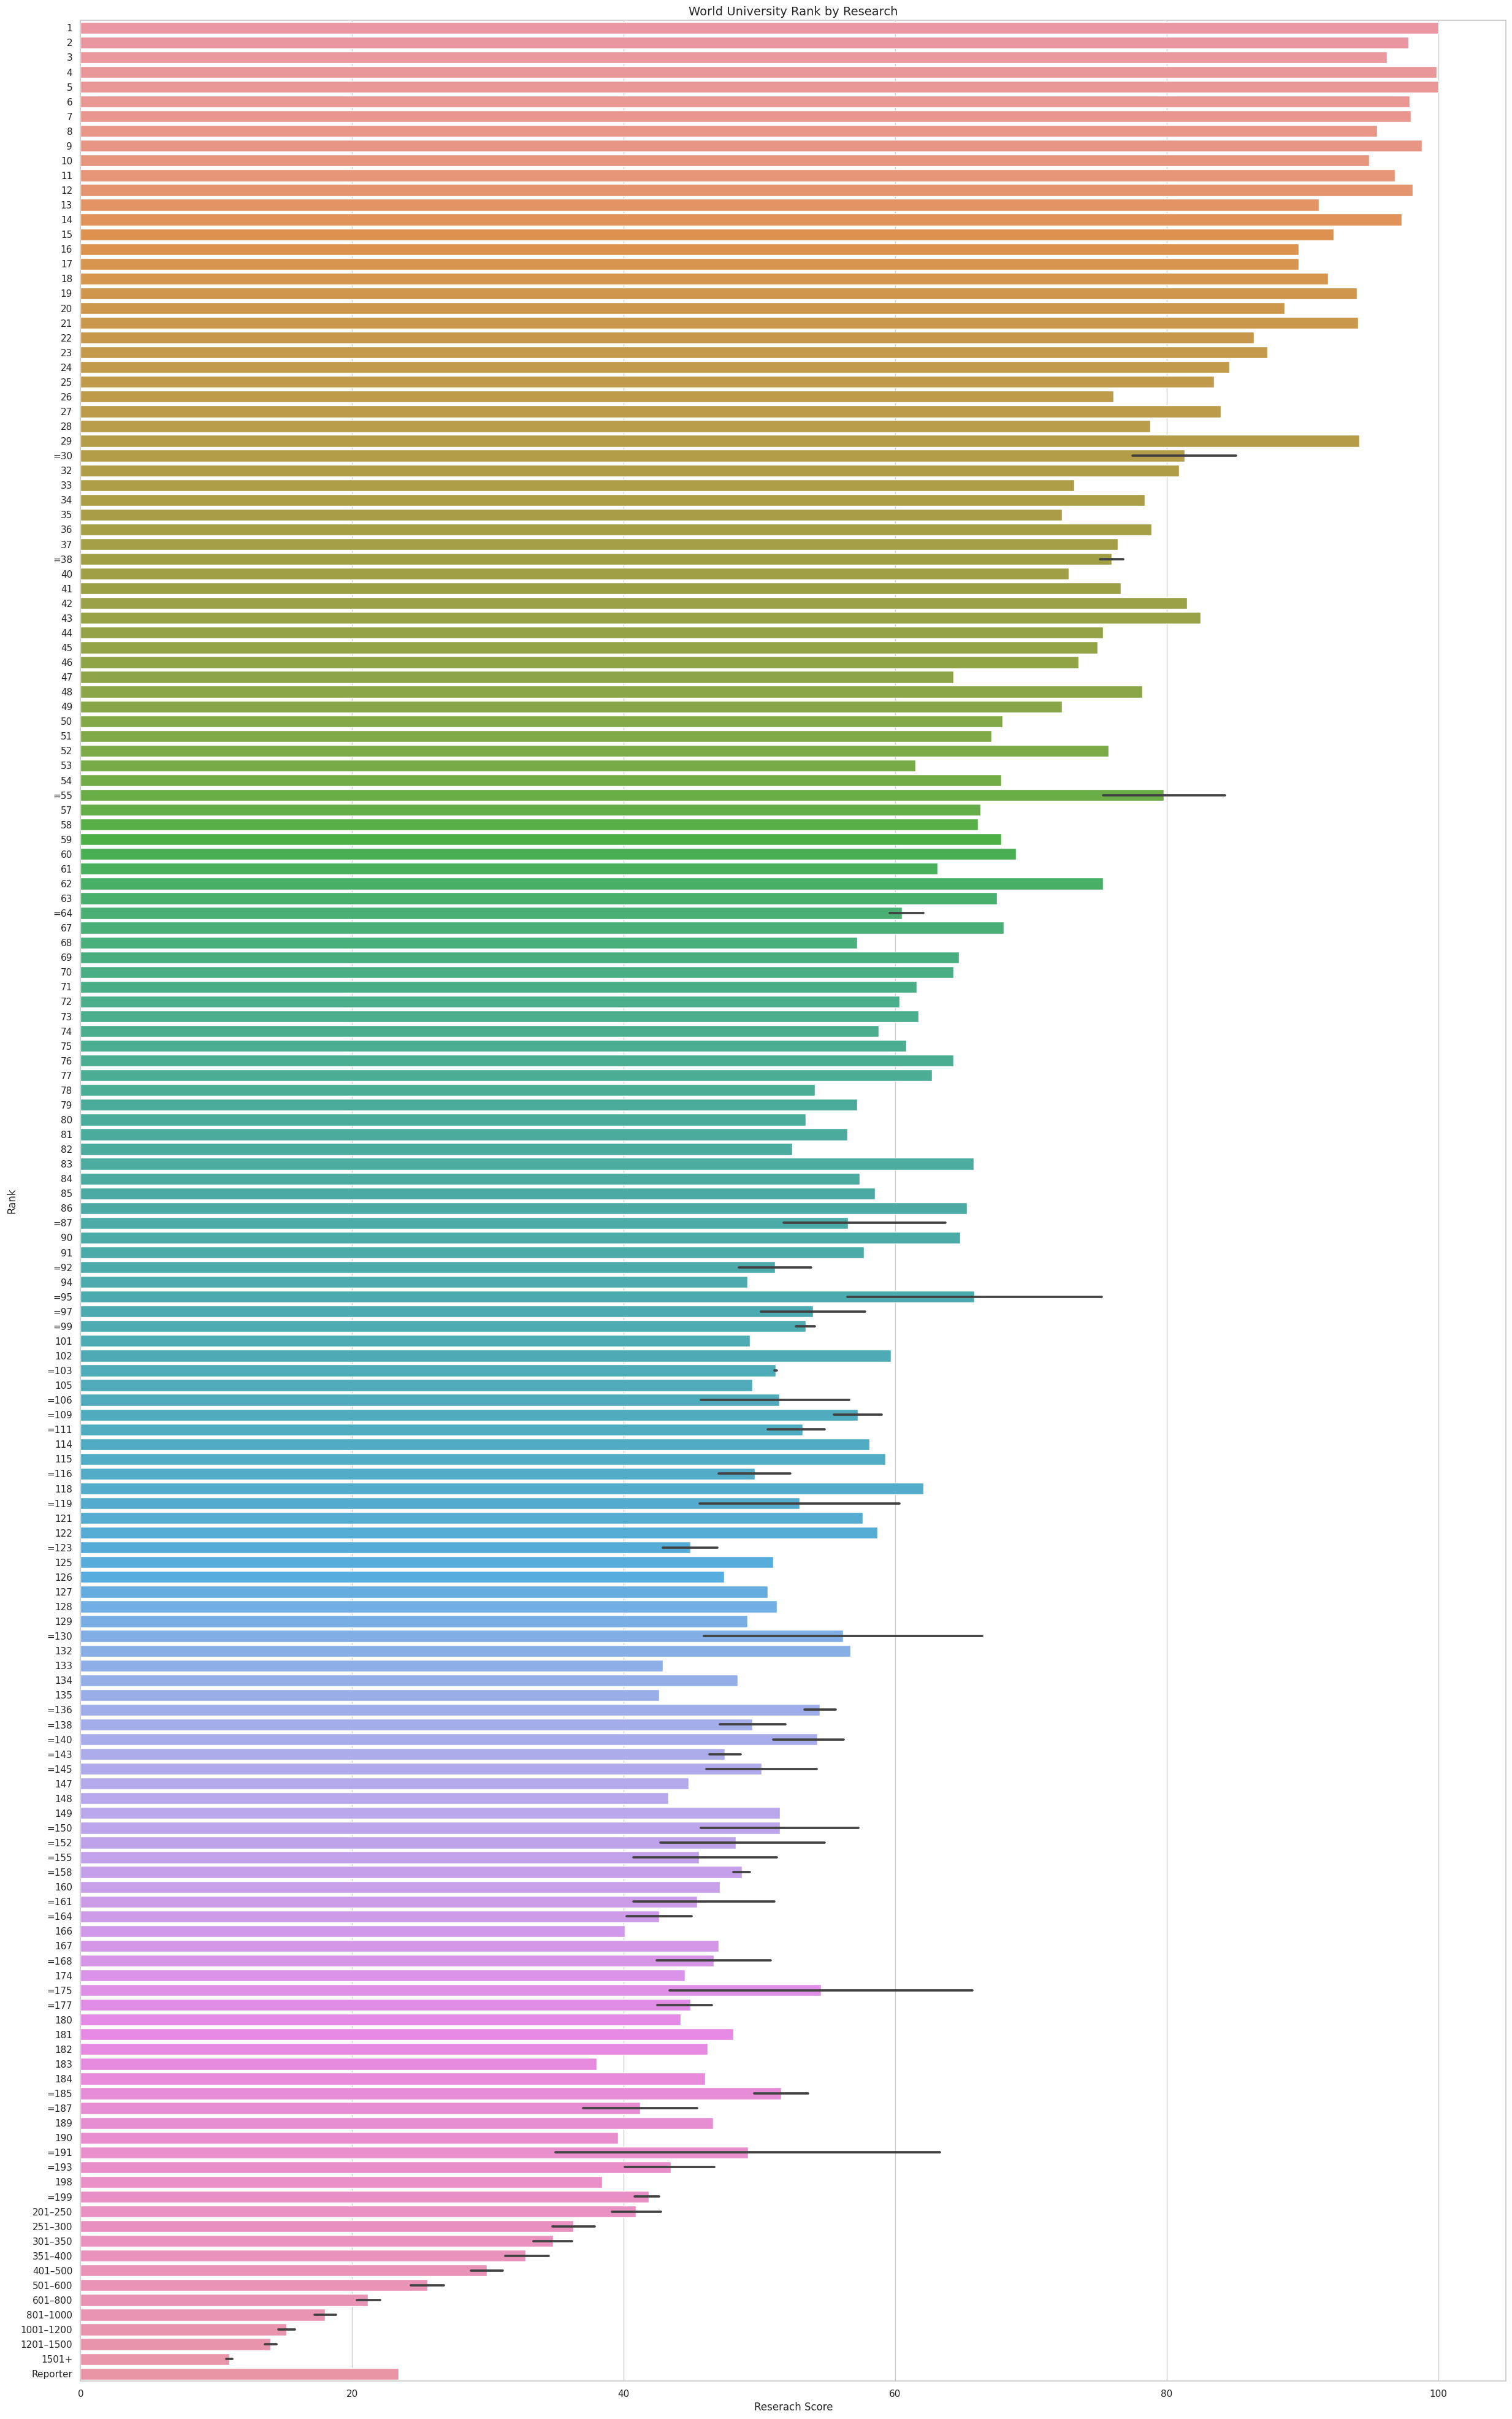

In [48]:
plt.figure(figsize=(30,50))
sns.barplot(data=wur,  x="scores_research", y="rank")
plt.title("World University Rank by Research", fontsize=14) 
plt.xlabel("Reserach Score", fontsize=12) 
plt.ylabel("Rank", fontsize=12)

#### So, research be a focus of universities to improve their quality (world rank)

### 1.5 Distribution of world university rank across citations

Text(0, 0.5, 'Rank')

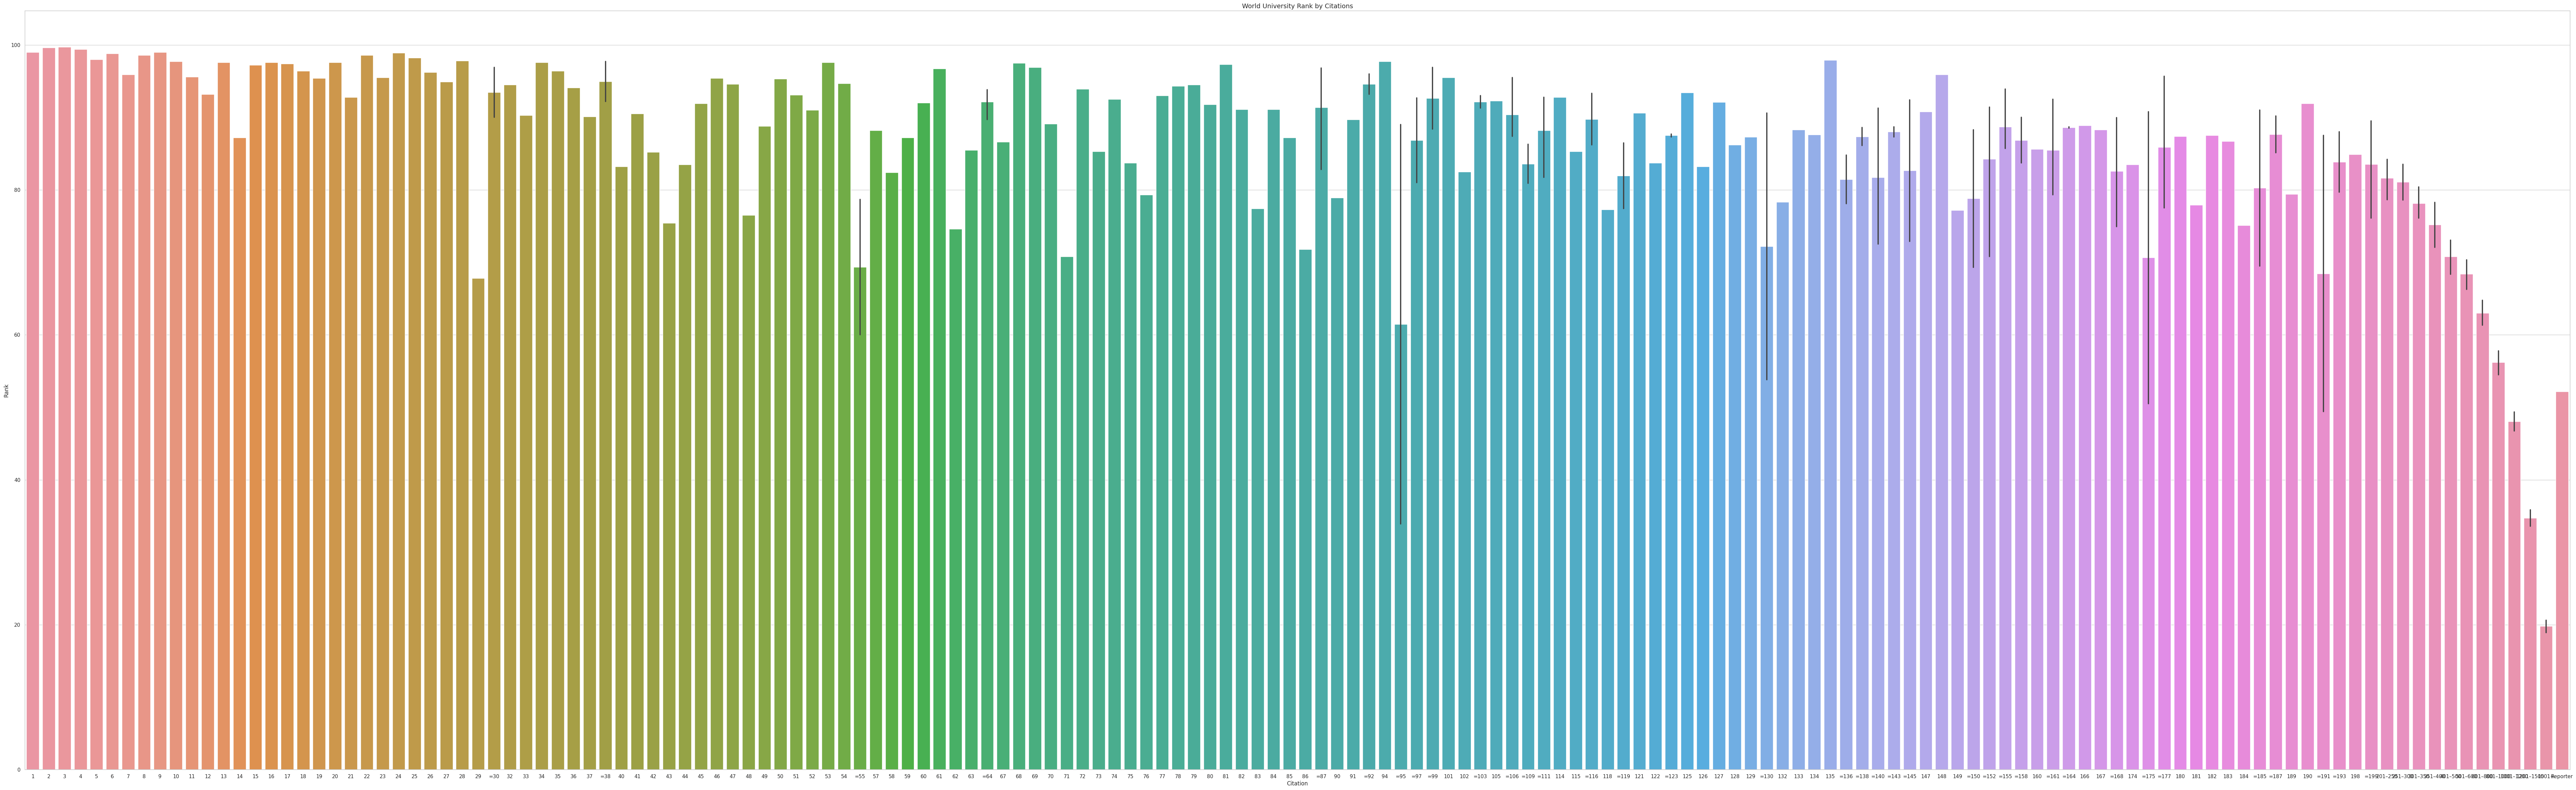

In [49]:
plt.figure(figsize=(100,30))
sns.barplot(data=wur,  x="rank", y="scores_citations")
plt.title("World University Rank by Citations", fontsize=14) 
plt.xlabel("Citation", fontsize=12) 
plt.ylabel("Rank", fontsize=12)

#### So, citation also be a focus of universities to improve their quality (world rank)

### 1.6 Distribution of world university rank across teaching 

Text(0, 0.5, 'Teaching Score')

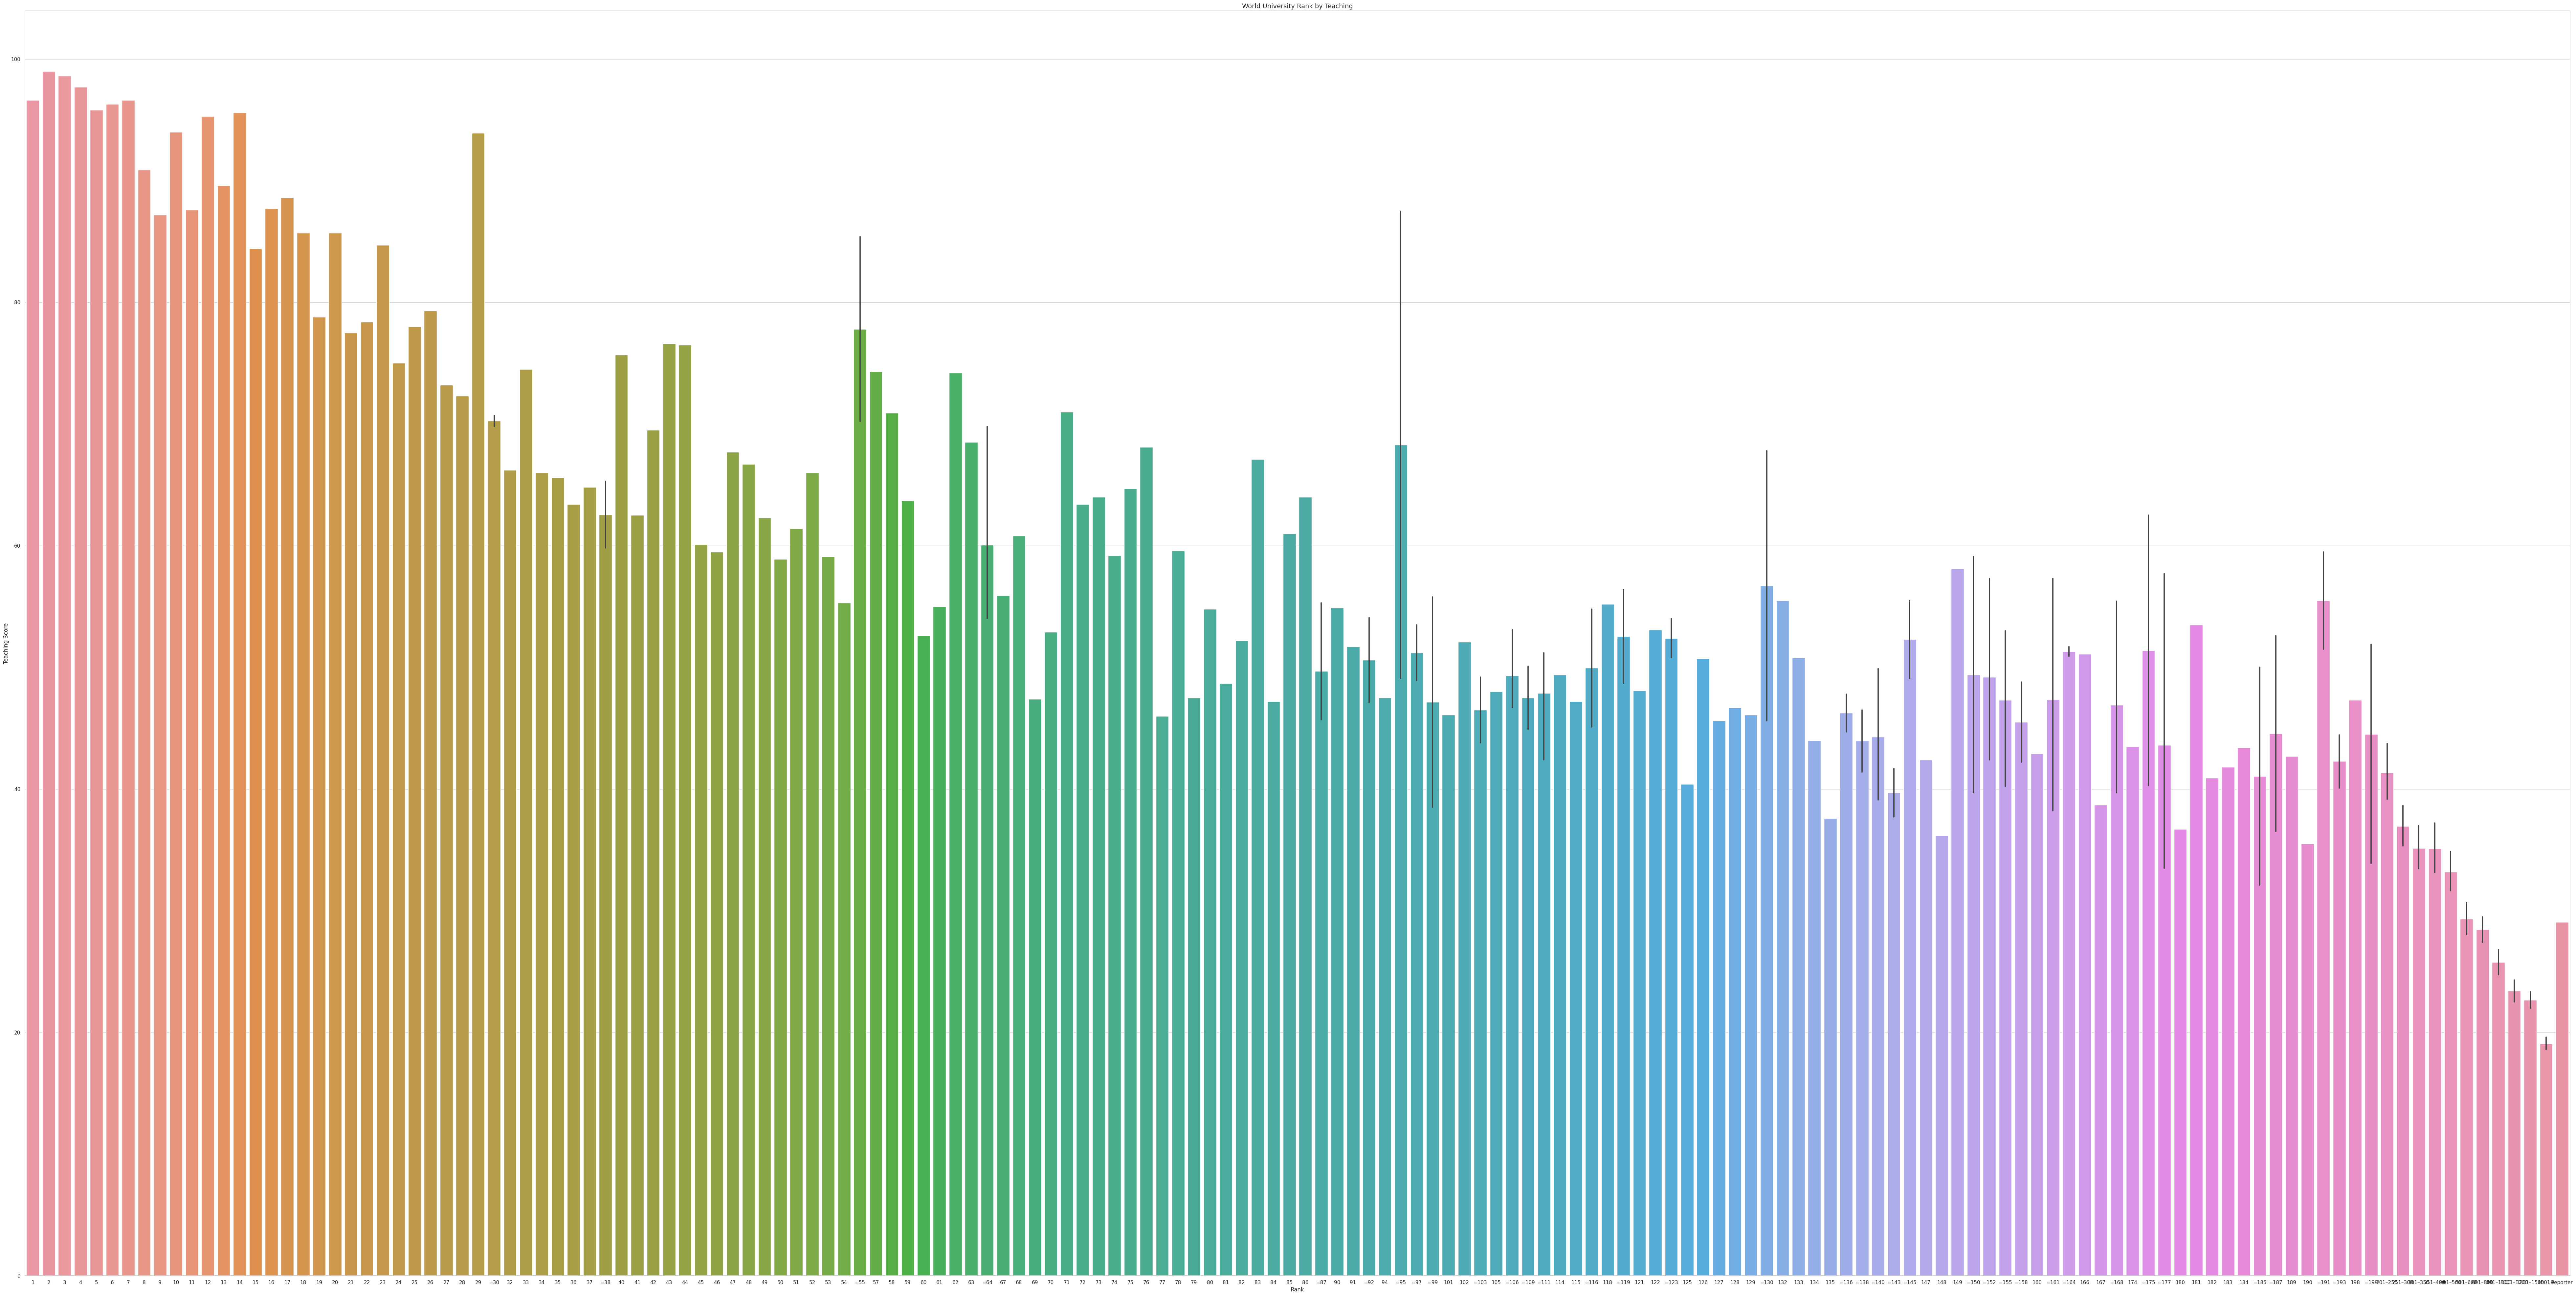

In [50]:
plt.figure(figsize=(100,50))
sns.barplot(data=wur,  x="rank", y="scores_teaching")
plt.title("World University Rank by Teaching", fontsize=14) 
plt.xlabel("Rank", fontsize=12) 
plt.ylabel("Teaching Score", fontsize=12)

There is a trend the higher rank of university has better score in teaching

### 1.7 Distribution of world university rank across number of students

Text(0, 0.5, 'Number of Students')

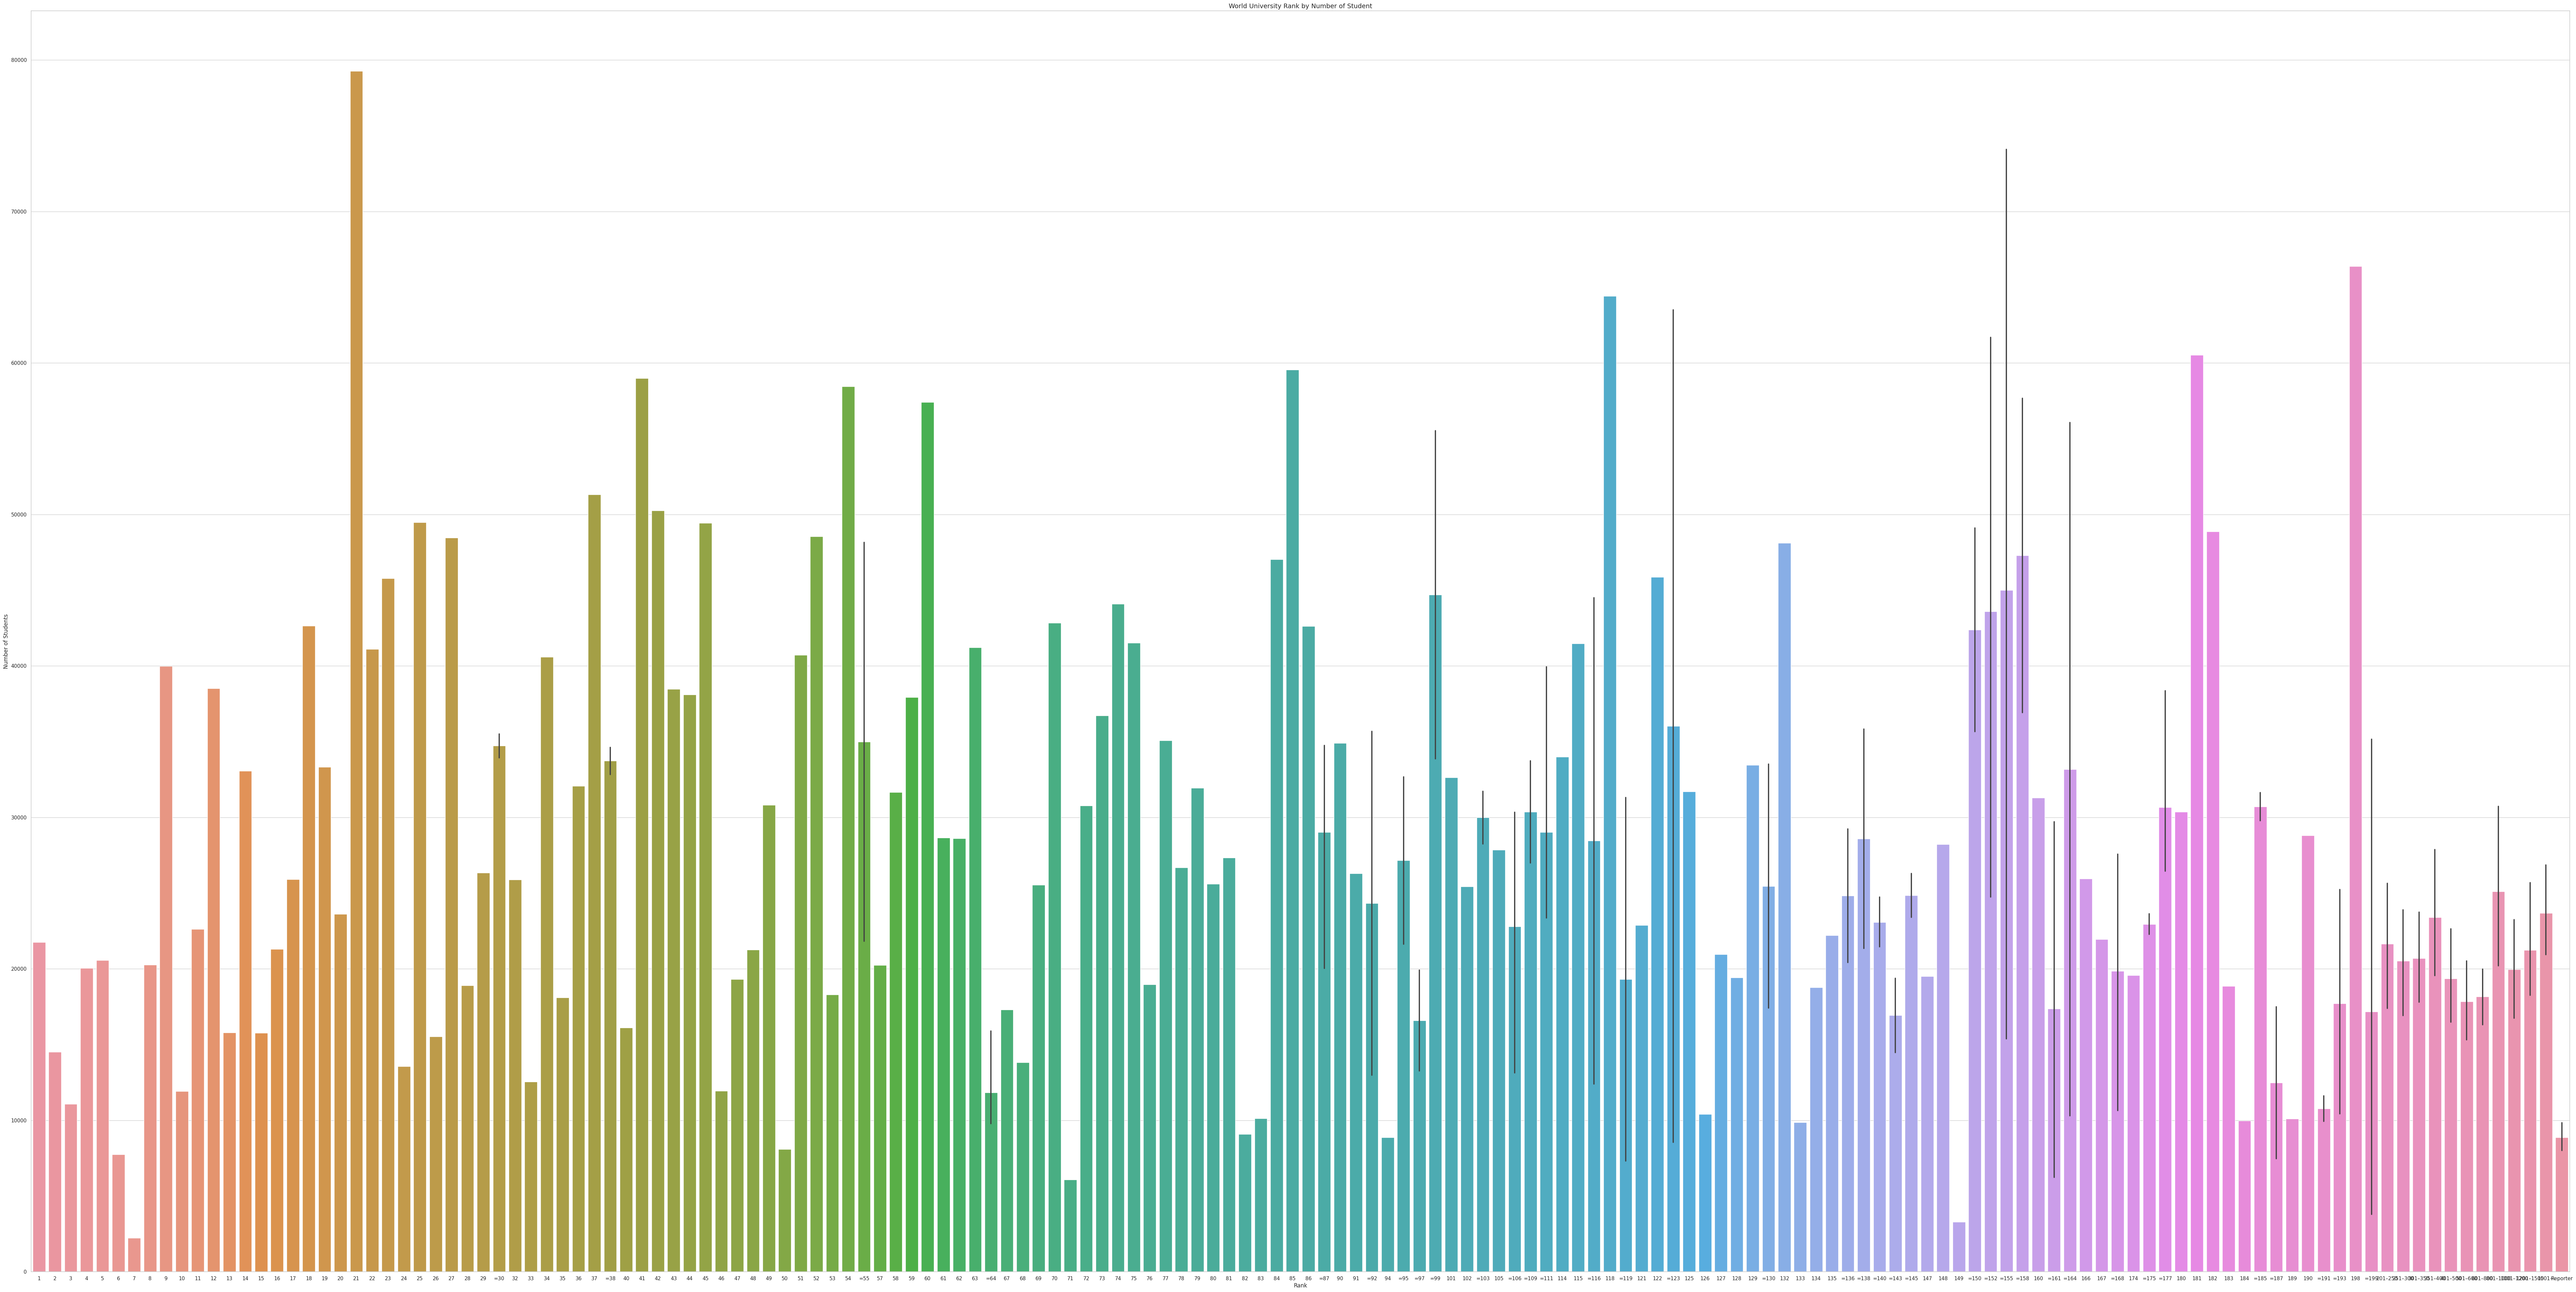

In [51]:
plt.figure(figsize=(100,50))
sns.barplot(data=wur,  x="rank", y="stats_number_students")
plt.title("World University Rank by Number of Student", fontsize=14) 
plt.xlabel("Rank", fontsize=12) 
plt.ylabel("Number of Students", fontsize=12)

So, the number of students don't be a focus of top rank university to improve their quality

### 1.8 Distribution of world university rank across International Look

Text(0, 0.5, 'Teaching Score')

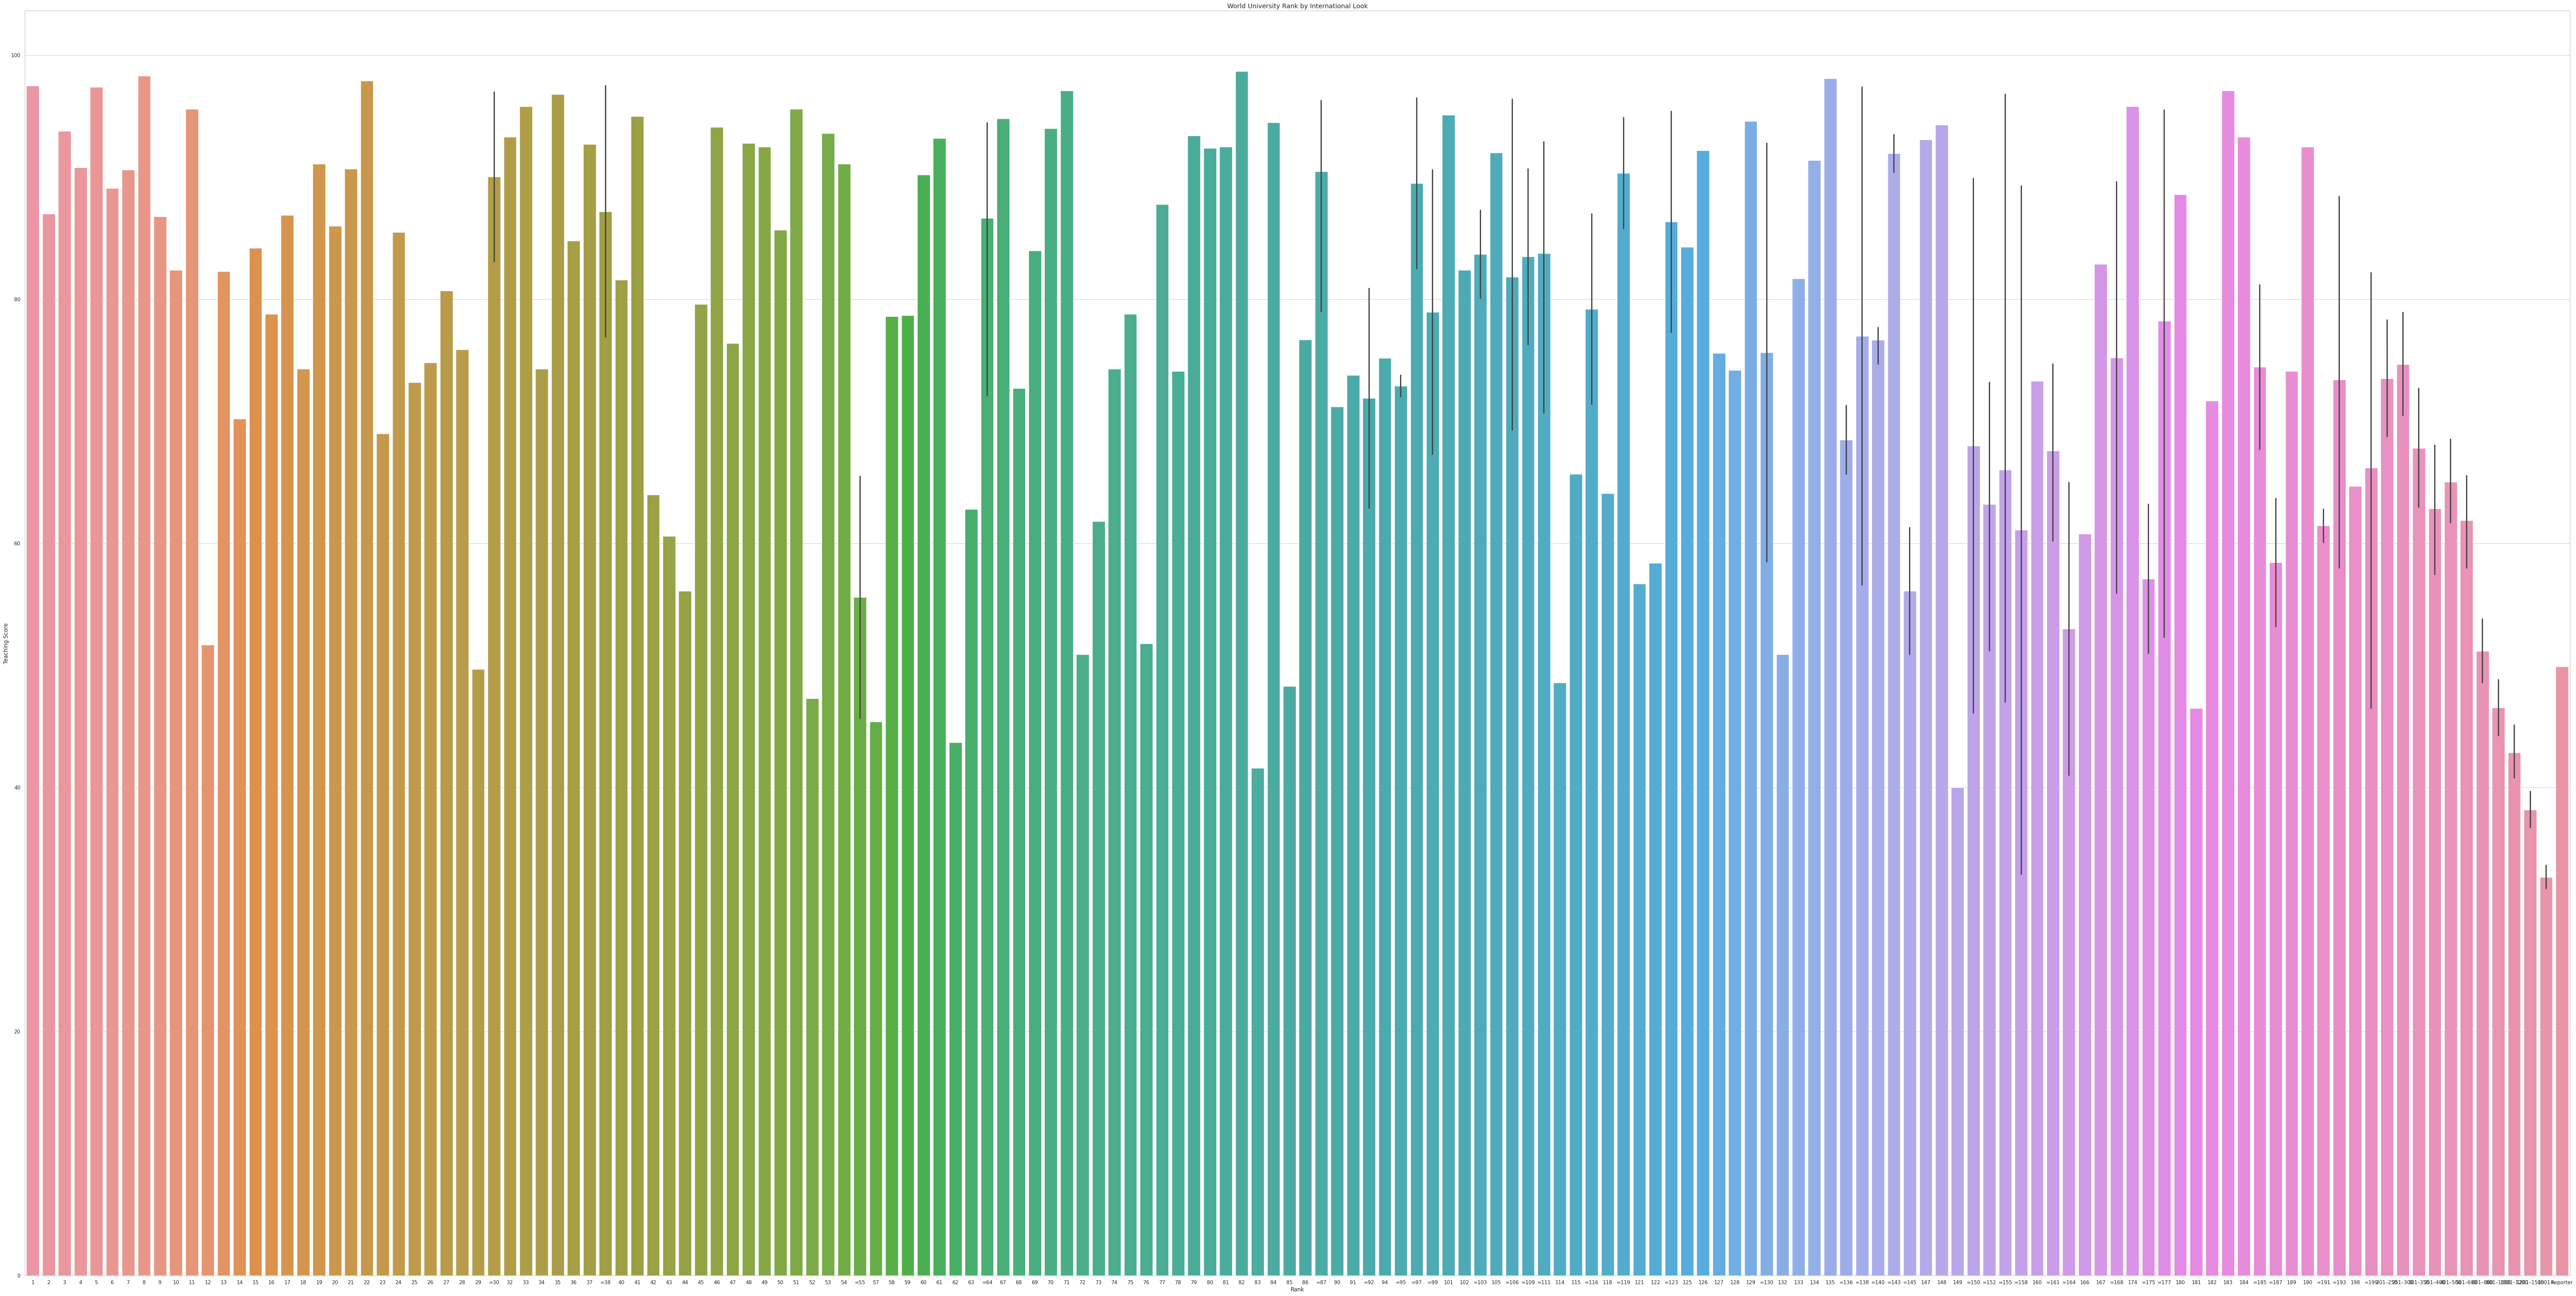

In [52]:
plt.figure(figsize=(100,50))
sns.barplot(data=wur,  x="rank", y="scores_international_outlook")
plt.title("World University Rank by International Look", fontsize=14) 
plt.xlabel("Rank", fontsize=12) 
plt.ylabel("Teaching Score", fontsize=12)

Besides research, citations, and teaching, International look also be a focus of universities to improve their quality

# Acknowledgments

This is the end of my analysis of the TIMES World University Ranking 2024 Dataset. I'm a beginner in this field. I write this analysis to up my knowledge and skill. I aware, that there are many limitations in my code. So, I am open to suggestions for improving my knowledge and skills. Thank You!